### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
# Calculate total revenue for each store
faturamento_total = pd.Series({
    'Loja 1': loja1['Preço'].sum(),
    'Loja 2': loja2['Preço'].sum(),
    'Loja 3': loja3['Preço'].sum(),
    'Loja 4': loja4['Preço'].sum()
})

# Adicionar o faturamento total para todas as lojas no mesmo DataFrame
faturamento_df = faturamento_total.reset_index()

# Renomear as colunas para ficar mais claro
faturamento_df.columns = ['Loja', 'Faturamento Total']

# Formatar o Faturamento Total como moeda para todas as lojas
faturamento_df['Faturamento Total'] = faturamento_df['Faturamento Total'].apply(
    lambda x: f"R$ {x:,.2f}".replace(",", "_").replace(".", ",").replace("_", ".")
)

print("\nFaturamento total de cada loja (em ordem descrescente):\n")
faturamento_df.sort_values(by='Faturamento Total', ascending=False)



Faturamento total de cada loja (em ordem descrescente):



,Loja,Faturamento Total
0,Loja 1,"R$ 1.534.509,12"
1,Loja 2,"R$ 1.488.459,06"
2,Loja 3,"R$ 1.464.025,03"
3,Loja 4,"R$ 1.384.497,58"


# 2. Vendas por Categoria


In [ ]:
# Agrupando as vendas por categoria de produto em cada loja
categoria_loja1 = pd.read_csv(url).groupby('Categoria do Produto')['Preço'].sum()
categoria_loja2 = loja2.groupby('Categoria do Produto')['Preço'].sum()
categoria_loja3 = loja3.groupby('Categoria do Produto')['Preço'].sum()
categoria_loja4 = loja4.groupby('Categoria do Produto')['Preço'].sum()

# Juntando os dados em um único DataFrame
vendas_categoria = pd.DataFrame({
'Loja 1': categoria_loja1,
'Loja 2': categoria_loja2,
'Loja 3': categoria_loja3,
'Loja 4': categoria_loja4
})

# Criando o DataFrame faturamento_df a partir das vendas por categoria
faturamento_df = vendas_categoria.sum(axis=1).reset_index()
faturamento_df.columns = ['Loja', 'Faturamento Total']

# Formatar as vendas de categoria como moeda para todas as lojas
for loja in vendas_categoria.columns:
    vendas_categoria[loja] = vendas_categoria[loja].apply(
    lambda x: f"R$ {x:,.2f}".replace(",", "_").replace(".", ",").replace("_", ".")
    )


from IPython.display import Markdown

# Título em Markdown
display(Markdown("Vendas de cada loja de acordo com a categoria"))

# Mostrar o DataFrame formatado
display(vendas_categoria)

Vendas de cada loja de acordo com a categoria

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
brinquedos,"R$ 23.993,78","R$ 21.262,21","R$ 25.869,20","R$ 27.015,67"
eletrodomesticos,"R$ 484.913,36","R$ 464.758,13","R$ 438.984,89","R$ 377.680,65"
eletronicos,"R$ 572.659,23","R$ 547.773,71","R$ 547.699,92","R$ 545.966,86"
esporte e lazer,"R$ 52.387,55","R$ 46.326,09","R$ 47.456,10","R$ 44.465,65"
instrumentos musicais,"R$ 121.731,69","R$ 139.987,03","R$ 103.174,45","R$ 100.136,50"
livros,"R$ 11.713,92","R$ 13.454,35","R$ 12.664,70","R$ 12.427,77"
moveis,"R$ 250.178,11","R$ 235.234,68","R$ 268.095,56","R$ 256.705,65"
utilidades domesticas,"R$ 16.931,48","R$ 19.662,86","R$ 20.080,21","R$ 20.098,83"


# 3. Média de Avaliação das Lojas

In [ ]:
# Calcular a média das avaliações para cada loja
media_avaliacoes = pd.Series({
    'Loja 1': loja1['Avaliação da compra'].mean(),
    'Loja 2': loja2['Avaliação da compra'].mean(),
    'Loja 3': loja3['Avaliação da compra'].mean(),
    'Loja 4': loja4['Avaliação da compra'].mean()
})

# Transformar em um DataFrame
media_avaliacoes_df = media_avaliacoes.reset_index()

# Renomear as colunas para ficar claro
media_avaliacoes_df.columns = ['Loja', 'Média de Avaliação']

# Arredondar para duas casas decimais
media_avaliacoes_df['Média de Avaliação'] = media_avaliacoes_df['Média de Avaliação'].round(2)

# Título
print("\nAvaliação média por loja (de 1 a 5):\n")

# Mostrar a tabela formatada
display(media_avaliacoes_df.sort_values(by='Média de Avaliação', ascending=False))


Avaliação média por loja (de 1 a 5):



,Loja,Média de Avaliação
2,Loja 3,4.05
1,Loja 2,4.04
3,Loja 4,4.00
0,Loja 1,3.98


# 4. Produtos Mais e Menos Vendidos

In [ ]:
# Criar uma lista para armazenar os dados
dados_vendas = []

def analisar_vendas(loja, nome_loja):
    produto_loja = loja['Produto'].value_counts().reset_index()
    produto_loja.columns = ['Produto', 'Quantidade Vendida']

    # Pegar o mais vendido e o menos vendido
    mais_vendido = produto_loja.iloc[0]
    menos_vendido = produto_loja.iloc[-1]

    # Adicionar duas linhas na lista: 1ª com produtos, 2ª com quantidades
    dados_vendas.append({
        'Loja': nome_loja,
        'Produto mais vendido': mais_vendido['Produto'],
        'Produto menos vendido': menos_vendido['Produto']
    })
    dados_vendas.append({
        'Loja': '',
        'Produto mais vendido': mais_vendido['Quantidade Vendida'],
        'Produto menos vendido': menos_vendido['Quantidade Vendida']
    })

# Rodar para cada loja
analisar_vendas(loja1, "Loja 1")
analisar_vendas(loja2, "Loja 2")
analisar_vendas(loja3, "Loja 3")
analisar_vendas(loja4, "Loja 4")

# Transformar em DataFrame
resumo_vendas_df = pd.DataFrame(dados_vendas)

# Mostrar resultado
display(resumo_vendas_df)

,Loja,Produto mais vendido,Produto menos vendido
0,Loja 1,Micro-ondas,Celular ABXY
1,,60,33
2,Loja 2,Iniciando em programação,Jogo de tabuleiro
3,,65,32
4,Loja 3,Kit banquetas,Blocos de montar
5,,57,35
6,Loja 4,Cama box,Guitarra
7,,62,33


# 5. Frete Médio por Loja


In [ ]:
# Calculando o custo médio de frete para cada loja
lojas = [loja1, loja2, loja3, loja4]

# Criando uma lista para armazenar o custo médio por loja
custos_medio = []

# Para cada DataFrame de loja, calculamos o custo médio de frete
for i, loja in enumerate(lojas, start=1):
    custo_medio = loja['Frete'].mean()  # Calculando o custo médio de frete
    custos_medio.append({'Loja': f'Loja {i}', 'Custo Médio de Frete': custo_medio})

# Convertendo a lista para um DataFrame
df_custos_medio = pd.DataFrame(custos_medio)

# Formatar os valores de frete
df_custos_medio['Custo Médio de Frete'] = df_custos_medio['Custo Médio de Frete'].apply(
    lambda x: f"R$ {x:,.2f}".replace(",", "_").replace(".", ",").replace("_", ".")
)

# Mostrar resultados
display(df_custos_medio)

,Loja,Custo Médio de Frete
0,Loja 1,"R$ 34,69"
1,Loja 2,"R$ 33,62"
2,Loja 3,"R$ 33,07"
3,Loja 4,"R$ 31,28"


# 6. Análises por Gráfico


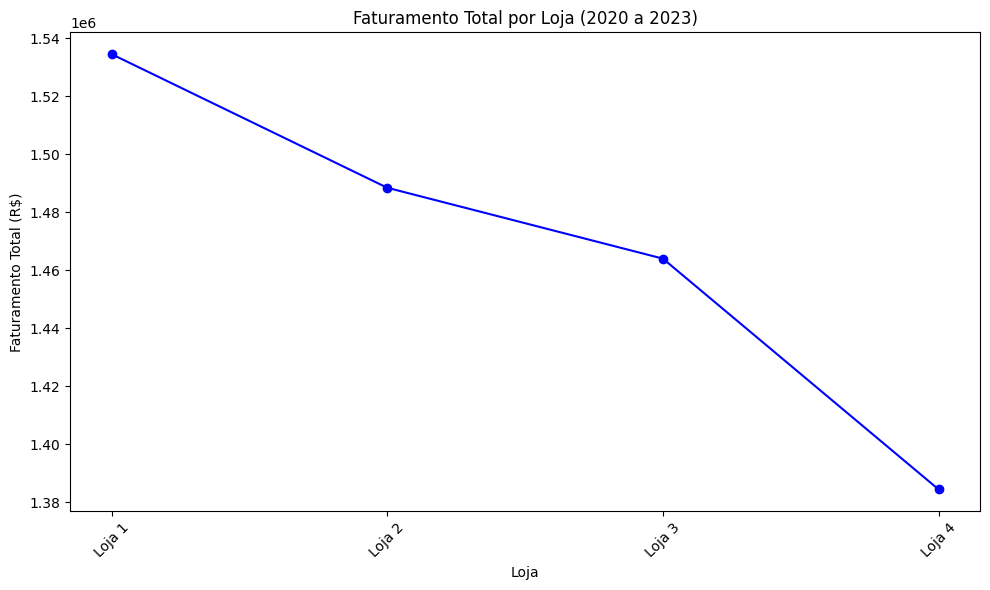

In [ ]:
# Gráfico de linhas
plt.figure(figsize=(10, 6))  # Tamanho do gráfico
plt.plot(faturamento_df['Loja'], faturamento_total, marker='o', linestyle='-', color='b')  # Gráfico de linhas
plt.xlabel('Loja')  # Rótulo do eixo X
plt.ylabel('Faturamento Total (R$)')  # Rótulo do eixo Y
plt.title('Faturamento Total por Loja (2020 a 2023)')  # Título do gráfico
plt.xticks(rotation=45)  # Rotacionar os nomes das lojas para melhor visualização
plt.tight_layout()  # Ajuste do layout para não cortar as legendas
plt.show()


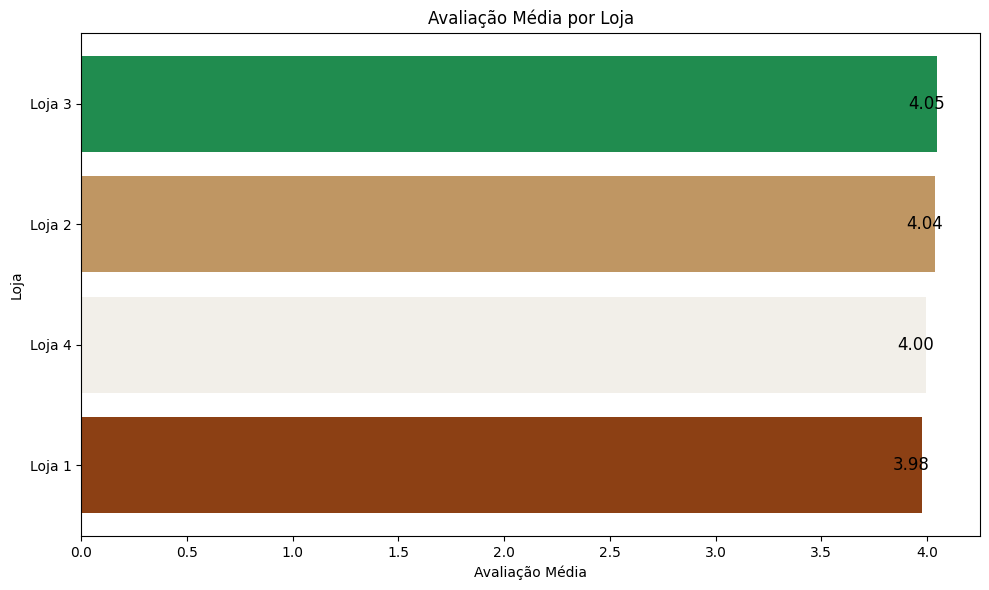

In [ ]:
import matplotlib.pyplot as plt

# Calcular a média das avaliações para cada loja
avaliacao_media = pd.Series({
    'Loja 1': loja1['Avaliação da compra'].mean(),
    'Loja 2': loja2['Avaliação da compra'].mean(),
    'Loja 3': loja3['Avaliação da compra'].mean(),
    'Loja 4': loja4['Avaliação da compra'].mean()
})

# Adicionar a média das avaliações para todas as lojas no mesmo DataFrame
avaliacao_df = avaliacao_media.reset_index()

# Renomear as colunas para ficar mais claro
avaliacao_df.columns = ['Loja', 'Avaliação Média']

# Ordenar as lojas pela avaliação média de forma decrescente
avaliacao_df = avaliacao_df.sort_values(by='Avaliação Média', ascending=True)

# Definir as cores para as barras (um por loja)
cores = ['#8C4014', '#F2EFE9', '#BF9663', '#208C4F']  # Escolha de cores personalizadas

# Plotando o gráfico de barras horizontais
plt.figure(figsize=(10, 6))  # Tamanho do gráfico
bars = plt.barh(avaliacao_df['Loja'], avaliacao_df['Avaliação Média'], color=cores)  # Usando a coluna ordenada

# Adicionando as avaliações dentro das barras
for bar in bars:
    plt.text(bar.get_width() - 0.05, bar.get_y() + bar.get_height()/2,  # Posição do texto
             f'{bar.get_width():.2f}', ha='center', va='center', color='black', fontsize=12)

plt.xlabel('Avaliação Média')  # Rótulo do eixo X
plt.ylabel('Loja')  # Rótulo do eixo Y
plt.title('Avaliação Média por Loja')  # Título do gráfico
plt.tight_layout()  # Ajuste do layout para não cortar as legendas
plt.show()


In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Carregar os dados das lojas
urls = {
    'Loja 1': "https://raw.githubusercontent.com/AnaBia044/Challenge-Alura-Store/refs/heads/main/loja_1.csv",
    'Loja 2': "https://raw.githubusercontent.com/AnaBia044/Challenge-Alura-Store/refs/heads/main/loja_2.csv",
    'Loja 3': "https://raw.githubusercontent.com/AnaBia044/Challenge-Alura-Store/refs/heads/main/loja_3.csv",
    'Loja 4': "https://raw.githubusercontent.com/AnaBia044/Challenge-Alura-Store/refs/heads/main/loja_4.csv"
}

# Carregar os dados e adicionar coluna 'Loja'
dfs = []
for nome, url in urls.items():
    df = pd.read_csv(url, encoding='latin-1')
    df['Loja'] = nome
    dfs.append(df)

# Concatenar todos os dados
df_total = pd.concat(dfs, ignore_index=True)

# Criar mapa de calor para cada loja
for nome in urls.keys():
    loja_df = df_total[df_total['Loja'] == nome]
    heat_data = [[row['lat'], row['lon']] for index, row in loja_df.iterrows()]

    # Criar o mapa base centralizado no Brasil
    mapa = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

    # Adicionar o HeatMap ao mapa
    HeatMap(heat_data, radius=15).add_to(mapa)

    # Exibir mapa por loja
    mapa.save(f'{nome}_heatmap.html')

from google.colab import files

# Salvar os mapas como arquivos HTML
for nome in urls.keys():
    loja_df = df_total[df_total['Loja'] == nome]
    heat_data = [[row['lat'], row['lon']] for index, row in loja_df.iterrows()]

    # Criar o mapa base centralizado no Brasil
    mapa = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)
    HeatMap(heat_data, radius=15).add_to(mapa)

    # Salvar como HTML
    mapa.save(f'{nome}_heatmap.html')

    # Gerar link de download
    files.download(f'{nome}_heatmap.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# URLs das lojas
urls = {
    "Loja 1": "https://raw.githubusercontent.com/AnaBia044/Challenge-Alura-Store/refs/heads/main/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/AnaBia044/Challenge-Alura-Store/refs/heads/main/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/AnaBia044/Challenge-Alura-Store/refs/heads/main/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/AnaBia044/Challenge-Alura-Store/refs/heads/main/loja_4.csv",
}

# Unir todos os dados em um único DataFrame
df_total = pd.concat([pd.read_csv(url, encoding='latin-1').assign(Loja=nome) for nome, url in urls.items()])

# Criar o mapa centralizado no Brasil
mapa_total = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Preparar os dados para o HeatMap
heat_data_total = [[row['lat'], row['lon']] for _, row in df_total.iterrows()]

# Adicionar o HeatMap ao mapa
HeatMap(heat_data_total, radius=15).add_to(mapa_total)

# Salvar o mapa
mapa_total.save('heatmap_consolidado.html')

# Para download direto no Colab
from google.colab import files
files.download('heatmap_consolidado.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ✅ Relatório Final

### ✅ Análises detalhadas:

### 1. Faturamento total das lojas
- **Loja 1:** R$ 1.534.509,12  
- **Loja 2:** R$ 1.488.459,06  
- **Loja 3:** R$ 1.464.025,03  
- **Loja 4:** R$ 1.384.497,58  

**Análise:**  
A Loja 4 tem o menor faturamento entre as quatro, com uma diferença relevante para as demais. A Loja 1 lidera com folga.

---

### 2. Categorias mais e menos vendidas

**Padrão observado:**  
- As categorias com maior faturamento em todas as lojas são **eletrodomésticos** e **eletrônicos**.  
- A Loja 4 tem o menor faturamento em praticamente todas as categorias, especialmente em **eletrodomésticos** e **esporte e lazer**.  
- A diferença é mais expressiva no segmento de **eletrodomésticos**:  
  - Loja 1 vendeu quase R$ 485 mil  
  - Loja 4 vendeu cerca de R$ 377 mil  
  → Diferença superior a R$ 100 mil.  

**Análise:**  
A Loja 4 tem baixa performance nas categorias principais, o que impacta diretamente seu faturamento.

---

### 3. Média das avaliações de clientes
- **Loja 1:** 3.98  
- **Loja 2:** 4.04  
- **Loja 3:** 4.05  
- **Loja 4:** 4.00  

**Análise:**  
Todas as lojas têm boas avaliações, porém a Loja 4 não se destaca e fica atrás das Lojas 2 e 3.  
A Loja 3 é a mais bem avaliada, seguida pela Loja 2.

---

### 4. Produtos mais e menos vendidos
- **Loja 1:** Mais vendido: Micro-ondas (60) | Menos vendido: Celular ABXY (33)  
- **Loja 2:** Mais vendido: Iniciando em programação (65) | Menos vendido: Jogo de tabuleiro (32)  
- **Loja 3:** Mais vendido: Kit banquetas (57) | Menos vendido: Blocos de montar (35)  
- **Loja 4:** Mais vendido: Cama box (62) | Menos vendido: Guitarra (33)  

**Análise:**  
A Loja 4 tem um produto bem vendido (**Cama box**, 62 unidades), mas seus números são semelhantes aos das demais.  
Não há um produto campeão ou um grande fracasso que a diferencie nesse quesito.

---

### 5. Frete médio por loja
- **Loja 1:** R$ 34,69  
- **Loja 2:** R$ 33,62  
- **Loja 3:** R$ 33,07  
- **Loja 4:** R$ 31,28  

**Análise:**  
A Loja 4 tem o menor custo médio de frete, o que é um ponto positivo.  
Porém, essa economia **não foi suficiente** para impulsionar o faturamento ou superar os desempenhos inferiores nas vendas e avaliações.

---

### ✅ Síntese das forças e fraquezas da Loja 4:

| Aspecto            | Situação da Loja 4                        |
|--------------------|------------------------------------------|
| **Faturamento**    | ❌ Menor entre todas                     |
| **Categorias**     | ❌ Menores vendas nas principais         |
| **Avaliações**     | ❌ Não se destaca, mediana               |
| **Produtos**       | ⚖️ Sem diferenciais relevantes          |
| **Frete médio**    | ✅ Mais baixo                            |

---

### ✅ Recomendação final:

Com base nos dados analisados, a **Loja 4** é a mais indicada para ser **vendida**.

**Justificativas:**  
- **Desempenho inferior:** Menor faturamento e desempenho abaixo das outras lojas nas principais categorias.  
- **Avaliação mediana:** Não possui diferenciais em satisfação de clientes que justifiquem a manutenção.  
- **Frete mais barato:** Apesar do menor custo de frete, isso não compensou a baixa performance geral da loja.  
- **Potencial para venda:** A venda dessa unidade pode permitir ao Sr. João capitalizar e investir em outro empreendimento ou melhorar as operações das lojas restantes, que demonstram desempenho superior.

---

### ✅ Conclusão:

Recomenda-se que o **Senhor João venda a Loja 4**, pois é a unidade **menos eficiente** sob os aspectos financeiros e comerciais.
